## Importing All required Libraries 

In [1]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib
from stockstats import StockDataFrame as Sdf
import quandl
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
from dtreeplt import dtreeplt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from missingpy import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import re
from sklearn.preprocessing import RobustScaler
from docx import Document
from docx.enum.style import WD_STYLE_TYPE
from docx.enum.table import WD_TABLE_ALIGNMENT


C:\Users\phani\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Input Project Name and Data for Machine Learning

In [2]:
df = pd.read_csv(r'TitanicDataKaggleTrain.csv')
del df['PassengerId']

### Visualize all data

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


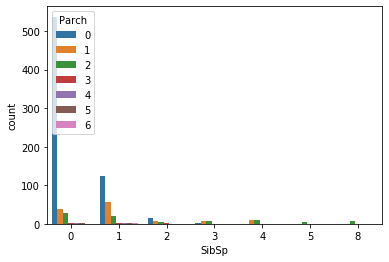

In [5]:
sns.countplot(x='SibSp', hue="Parch", data=df)

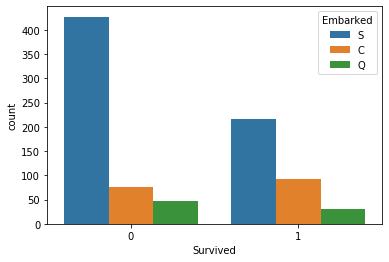

In [6]:
sns.countplot(x='Survived', hue="Embarked", data=df)

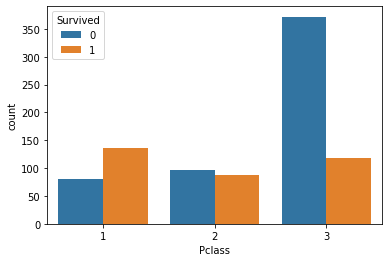

In [7]:
sns.countplot(x='Pclass', hue="Survived", data=df)

In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
dfp = df[['Pclass','Survived']]

In [10]:
dfp.corr()


,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [11]:
dfp[dfp.Survived == 1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [12]:
dfp[dfp.Survived == 0]['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [13]:
ps = {1 : (136/(136+80)),2:(87/(87+97)),3:(119/(119+372))}

In [14]:
ps

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

In [15]:
dfp.replace(1,.6296)
dfp.replace(2,.47282)
dfp.replace(3,.2423)
dfp.corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


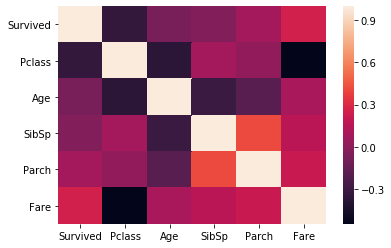

In [16]:
sns.heatmap(df.corr())

In [17]:
df.filter(items = ['Survived','Age','Pclass']).head()

,Survived,Age,Pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3


C:\Users\phani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\phani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


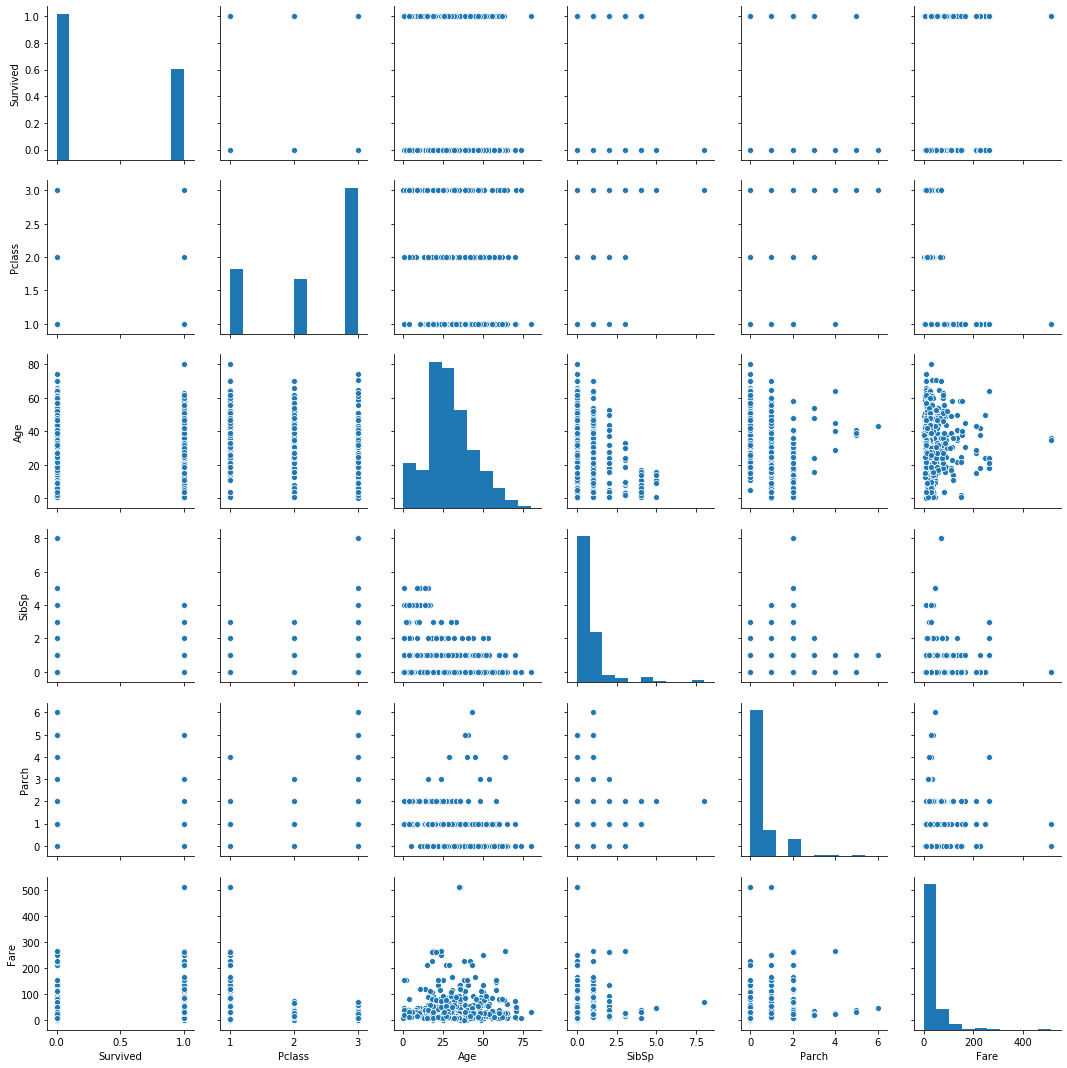

In [18]:
sns.pairplot(df)